<a href="https://colab.research.google.com/github/saeedshahi/Portfolio/blob/main/Phase_ploter/Phase_ploter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/Project_phase_ploter

/content/drive/MyDrive/Projects/Project_phase_ploter


**Import necessary libraries**

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.family'] = 'Helvetica'
#plt.rcParams['font.family'] = 'Arial'
#plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.family'] = 'Computer Modern'
#plt.rcParams['font.family'] = 'Palatino'
import numpy as np
import re
from pathlib import Path

In [ ]:
# !pip install rarfile
# import rarfile
# # Define file_path with the current directory
# base_path = Path.cwd() / "phase diagram_90 deg.rar"
# extract_to = Path.cwd() / "phase_diagram_90_deg"
# with rarfile.RarFile(base_path, 'r') as rar:
#     rar.extractall(extract_to)

<ipython-input-11-a63e5bd6f35a>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=10, weight='bold')
<ipython-input-11-a63e5bd6f35a>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10, weight='bold')


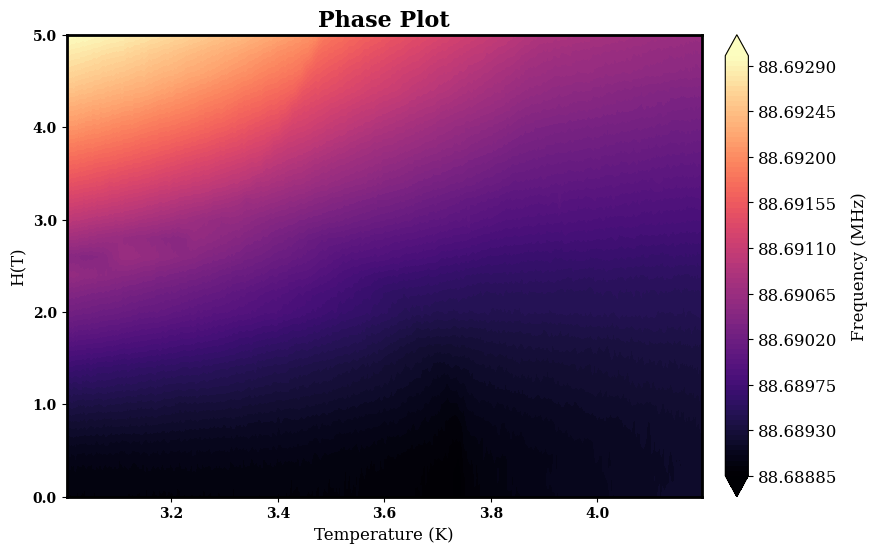

In [ ]:
def extract_H_value(line: str) -> float:
    match = re.search(r'sec, (.+?), Rot', line)
    if match:
        value = match.group(1)
        if 'T' in value:
            return float(value.rstrip('T'))
        return value
    return None

def read_files_and_extract_info(files):
    x_coordinates = []
    y_coordinates = []
    colors = []

    for file_path in files:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            first_line = file.readline().strip()
            y_coordinate = extract_H_value(first_line)

            file.readline()  # skip header

            for line in file:
                parts = line.split('\t')
                x_coordinates.append(float(parts[0]))
                y_coordinates.append(y_coordinate)
                colors.append(float(parts[1]))

    return x_coordinates, y_coordinates, colors


# def plot_data(x_coordinates, y_coordinates, colors):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sc = ax.scatter(x_coordinates, y_coordinates, c=colors, cmap='magma', s=30, marker='s')
#     cbar = fig.colorbar(sc, ax=ax, label='Frequency (MHz)')

#     ax.set_xlabel('Temperature (K)')
#     ax.set_ylabel('H(T)')
#     ax.set_ylim(0, 5)
#     ax.set_xlim(min(x_coordinates), max(x_coordinates))
#     ax.set_title('Phase Plot')
#     # Save the plot as an image file
#     plt.savefig('phase_plot.png', format='png', dpi=300)  # Save with desired filename, format and resolution
#     # Display the plot
#     plt.show()

def plot_data(x_coordinates, y_coordinates, colors):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a contour plot
    contour = ax.tricontourf(x_coordinates, y_coordinates, colors, levels=100, cmap='magma', extend='both')

    cbar = fig.colorbar(contour, ax=ax, orientation='vertical', format='%.5f', pad=0.03)
    cbar.set_label('Frequency (MHz)', fontsize=12, labelpad=10)

    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['right'].set_edgecolor('black')
    ax.spines['left'].set_edgecolor('black')

    font_properties = {'family': 'serif', 'weight': 'normal', 'size': 12}
    ax.set_ylim(0, 5)
    ax.set_xlim(min(x_coordinates), max(x_coordinates))
    ax.set_xlabel('Temperature (K)', fontdict=font_properties)
    ax.set_ylabel('H(T)', fontdict=font_properties)
    ax.set_title('Phase Plot', fontdict={'weight': 'bold', 'size': 16})

    ax.set_xticklabels(ax.get_xticks(), fontsize=10, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=10, weight='bold')

    ax.tick_params(axis='both', labelsize=10)

    # # Get current ticks and remove the first and the last ticks for x-axis
    # xticks = ax.get_xticks().tolist()
    # if len(xticks) > 1:  # Check to ensure there are enough ticks to remove
    #     xticks = xticks[1:-1]
    # ax.set_xticks(xticks)

    # # Get current ticks and remove the first and the last ticks for y-axis
    # yticks = ax.get_yticks().tolist()
    # if len(yticks) > 1:  # Check to ensure there are enough ticks to remove
    #     yticks = yticks[1:-1]
    # ax.set_yticks(yticks)

    # Save the plot as an image file
    plt.savefig('phase_plot.png', format='png', dpi=300)
    # Display the plot
    plt.show()

# Check if the directory exists
files_path = Path.cwd() / "phase_diagram_90_deg" / "phase diagram_90 deg"
if files_path.exists() and files_path.is_dir():
    files = list(files_path.iterdir())
else:
    print(f"The directory {files_path} does not exist.")
    files = []

# Read the files and extract the information
x_coordinates, y_coordinates, colors = read_files_and_extract_info(files)

# Plot the data
plot_data(x_coordinates, y_coordinates, colors)